Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-22 03:03:25--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-22 03:03:25--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-22 03:03:26 (52.1 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")

In [5]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

Las variables que contiene el conjunto de datos son:
CustomerID que es el identificador único de cada cliente, Gender, el género del cliente, que puede ser hombre o mujer, Age que es la edad del cliente, Annual Income (k$) que es el ingreso anual de los clientes, y el Spending Score (1-100) que es la puntuación del gasto basada en el comportamiento de compra y gasto del cliente.



Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [8]:
data.isna().sum()

data = data.dropna()

In [9]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [10]:
required_columns = ['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)']
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



Es importante normalizar los datos para que todas las variables estén en la misma escala, ya que K-means es sensible a las diferencias en las escalas de las variables. La normalización consiste en una técnica para escalar los datos, de manera que todas las variables tengan la misma importancia en el análisis,si esto no sucediera, el algoritmo puede dar resultados engañosos, ya que agruparía los datos por las variables con mayor escala, pero no necesariamente colocaría las más relevantes.

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


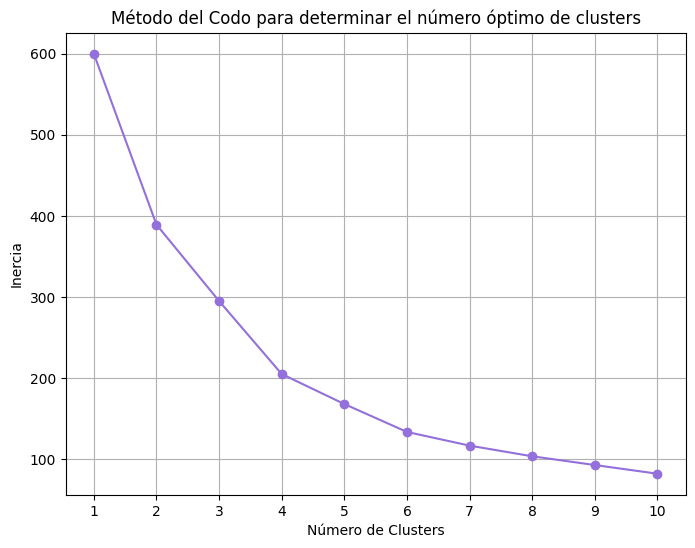

In [12]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', color='mediumpurple')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

En la gráfica obtenida, el punto donde parece fomarse el codo es en el cinco (5), por lo que los cluster apropiados para este ejercicio son cinco.

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [13]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [14]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,3
3,4,1,23,16,77,4
4,5,1,31,17,40,4


In [15]:
cluster_description = data.groupby('Cluster').count()
cluster_description

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,47,47,47,47,47
1,39,39,39,39,39
2,40,40,40,40,40
3,20,20,20,20,20
4,54,54,54,54,54


In [16]:
cluster_description = data.groupby('Cluster').mean()
cluster_description

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,83.872340,0.574468,55.638298,54.382979,48.851064
1,159.743590,0.487179,39.871795,86.102564,19.358974
2,161.025000,0.550000,32.875000,86.100000,81.525000
3,24.100000,0.600000,46.250000,26.750000,18.350000
4,55.648148,0.592593,25.185185,41.092593,62.240741


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

 Lo que se puede observar en los resultados es la distribucación de los clientes en diferentes clusters. Estos se distrubuyen acorde a su segmentación, es decir, por edad, por ingresos anuales y por puntuaciones de gastos. Por otro lado estos se dividen en 5 cluster:
 El primero cluster es el clientes con alto ingreso y alto puntuaje de gasto, El segundo es alto ingreso, pero bajo puntuaje de gasto, es decir, clientes que no compran mucho pero pueden ser potenciales compradores, el tercero es el cliente de ingreso y puntuaje de gasto promedio, el cuarto es de bajo ingreso y bajo puntuaje de gasto (clientes con poco valor comercial) y el quinto es bajo ingreso y alto puntuaje de gasto, es decir, compradores frecuentes pero con menos poder adquisitivo.

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [17]:
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.638298,54.382979,48.851064
1,39.871795,86.102564,19.358974
2,32.875000,86.100000,81.525000
3,46.250000,26.750000,18.350000
4,25.185185,41.092593,62.240741


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Las diferencias encontradas entre los cluster en términos de edad, ingresos y puntaje de gasto son el tamaño y valor del grupo, no todos los grupos son igual de rentables ni numerosos y otra diferencia es el nivel de ingreso y gasto de cada grupo.
Las características de los clusters:

Cluster 1: Clientes adultos con ingresos altos y puntaje de gasto medio, son compradores moderados con buen poder adquisitivo y que también gastan mucho.  
Cluster 2: Jóvenes con alto ingreso pero un puntaje de gasto bajo, probablemente sean consumidores leales a ciertos productos o marcas o pueden ser que su comportamiento de compra es más limitado ya sea por ahorro o porque saben en que quieren su dinero.    
Cluster 3: Adultos jóvenes con ingresos altos y alto puntaje de gasto, este es el cliente promedio porque no tiene comportamientos extremos, son controlados a la hora de invertir y recibir su dinero.   
Cluster 4: Adultos con ingresos bajos y bajo puntaje de gasto, representan un grupo menos rentable porque son clientes que no tienen muchos ingresos y compran tanto.
Cluster 5: Jóvenes con ingresos altos y alto puntaje de gasto. Son el grupo más rentable y representan a los mejores clientes.



Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

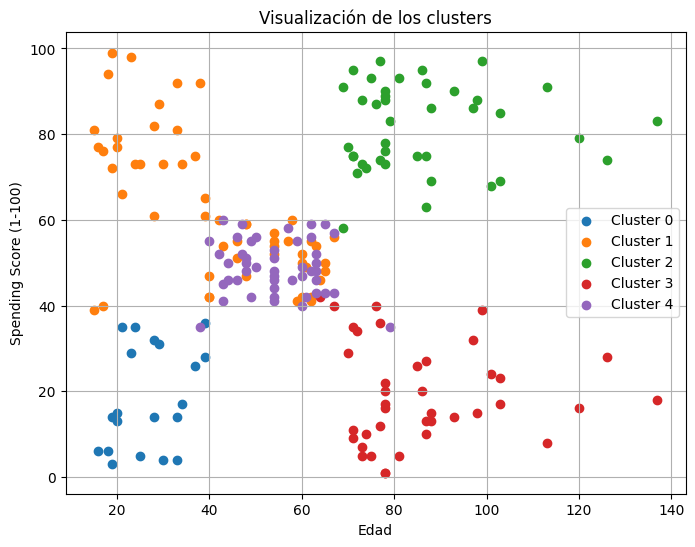

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))

for cluster in range(5):
    plt.scatter(
        data[data['Cluster'] == cluster]['Annual Income (k$)'],
        data[data['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Edad')
plt.ylabel('Spending Score (1-100)')
plt.title('Visualización de los clusters')
plt.legend()
plt.grid(True)
plt.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

Los patrones que puedo identificar visualmente en los datos son los 5 cluster divididos, pero no todos los clientes están claramente separados por grupos, algunos están muy compactos y bien definidos, como los clientes con ingresos altos y alto puntaje de gasto, lo que sugiere que comparten características muy similares. En cambio, hay clusters un poco más dispersos, lo que indica una mayor diversidad dentro de ese segmento.


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

Estos son los nombres que asignaría a cada Cluster:

Cluster 1: **Adultos clientes moderados** ya que son compradores con buen poder adquisitivo pero no gastán más que sus ingresos, sin embargo, si invierten en algunas compras.      
Cluster 2: **Jóvenes clientes potenciales** debido a que tienen un alto ingreso pero un bajo puntaje de gasto.     
Cluster 3: **Adultos jóvenes con un poder adquisitivo promedio** porque tienen ingresos altos y un alto puntaje de gasto, por lo que invierten en casi la misma cantidad.      
Cluster 4: **Adultos con bajo poder adquisitivo** puesto que son clientes que no tienen muchos ingresos y su puntuaje de gasto también es baja.
Cluster 5: **Jóvenes con alto poder adquisitivo** porque tienen ingresos altos y alto puntaje de gasto.